In [1]:
# Activate project enviroment 
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `c:\Users\Herbert\Documents\GitHub\AMO_Project`
┌ Warning: The project dependencies or compat requirements have changed since the manifest was last resolved.
│ It is recommended to `Pkg.resolve()` or consider `Pkg.update()` if necessary.
└ @ Pkg.API C:\workdir\usr\share\julia\stdlib\v1.8\Pkg\src\API.jl:1535


In [2]:
# die pakete die wir für dieses Notebook brauchen
using JuMP
using Plots
using XLSX
using DataFrames
using Complementarity
using Ipopt
using Distributions
using CSV
using HiGHS
using StatsPlots

In [36]:
base = DataFrame(CSV.File("./data/results/deterministic.csv"))
robust = DataFrame(CSV.File("./data/results/robustOptimization.csv"))
stochastic = DataFrame(CSV.File("./data/results/stochastic.csv"))

Row,objective,sum_generators,sum_wind,expected_wind,price,Cexp,Lshed,Wspill,Ureserve,Dreserve
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.53107e5,1805.72,401.28,370.388,151.0,4664.64,0.0,0.0,52.9859,0.0
2,147681.0,1773.04,433.963,406.188,151.0,4194.03,0.0,0.0,46.9821,0.0
3,1.42572e5,1741.48,465.524,439.999,151.0,3854.31,0.0,0.0,45.9307,0.0
4,1.3939e5,1721.9,485.098,461.106,151.0,3622.77,0.0,0.0,47.436,0.0
5,1.38591e5,1714.18,492.824,466.405,151.0,3989.33,0.0,0.0,47.832,0.0
6,1.38154e5,1715.43,491.575,469.213,151.0,3376.62,0.0,0.0,43.9467,0.0
7,1.37158e5,1708.14,498.858,475.754,151.0,3488.72,0.0,0.0,41.5154,0.0
8,1.37622e5,1711.48,495.52,472.677,151.0,3449.25,0.0,0.0,41.13,0.0
9,1.38679e5,1718.89,488.109,465.71,151.0,3382.16,0.0,0.0,42.768,0.0


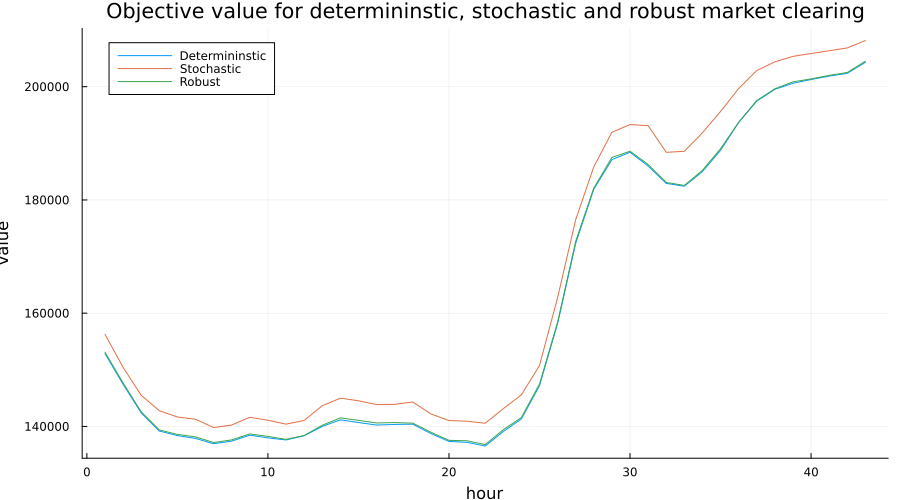

In [29]:
plot(collect(1:43),base.objective ,label = "Determininstic", xlabel = "hour", ylabel = "value",title="Objective value for determininstic, stochastic and robust market clearing",formatter =:plain, size =(900,500))
plot!(collect(1:43),robust.objective ,label = "Stochastic")
plot!(collect(1:43),stochastic.objective ,label = "Robust")

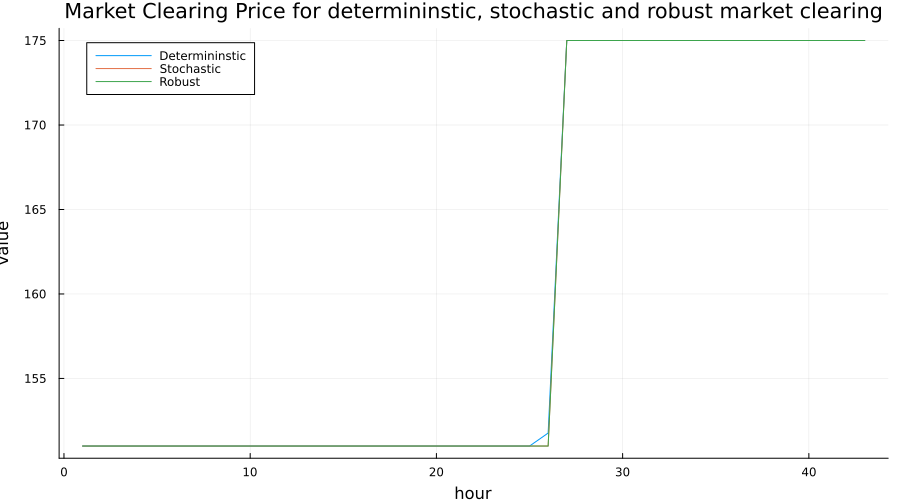

In [37]:
plot(collect(1:43),base.price ,label = "Determininstic", xlabel = "hour", ylabel = "value",title="Market Clearing Price for determininstic, stochastic and robust market clearing",formatter =:plain, size =(900,500))
plot!(collect(1:43),robust.price ,label = "Stochastic")
plot!(collect(1:43),stochastic.price ,label = "Robust")